<a href="https://colab.research.google.com/github/gunasekhar-13/Team-8/blob/main/Team_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/sales_transactions_regression.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  249 non-null    object 
 1   region          245 non-null    object 
 2   product_id      239 non-null    float64
 3   product_id.1    239 non-null    float64
 4   sales_amount    249 non-null    float64
 5   date            248 non-null    object 
 6   units_sold      241 non-null    float64
 7   unit_price      239 non-null    float64
 8   discount_pct    244 non-null    float64
 9   store_id        249 non-null    object 
 10  product_id.2    239 non-null    float64
 11  product_id.3    239 non-null    float64
dtypes: float64(8), object(4)
memory usage: 24.5+ KB


In [3]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,transaction_id,region,product_id,product_id.1,sales_amount,date,units_sold,unit_price,discount_pct,store_id,product_id.2,product_id.3
0,T50000,West,426.0,426.0,965.0340,2024-01-01,6.0,233.10,0.31,S2,426.0,426.0
1,T50001,East,394.0,394.0,992.0770,2024-01-02,5.0,241.97,0.18,S3,394.0,394.0
2,T50002,West,446.0,446.0,323.4660,2024-01-03,4.0,92.95,NaN,S2,446.0,446.0
3,T50003,South,136.0,136.0,3439.5648,2024-01-04,8.0,438.72,NaN,S4,136.0,136.0
4,T50004,South,287.0,287.0,1207.0240,2024-01-05,7.0,265.28,0.35,S4,287.0,287.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,T50245,West,391.0,391.0,1687.2426,2024-09-02,9.0,217.99,NaN,S4,391.0,391.0
246,T50246,Nort,365.0,365.0,492.7580,NaN,2.0,NaN,0.30,S4,365.0,365.0
247,T50247,Wet,346.0,346.0,1131.5192,2024-09-04,7.0,218.44,0.26,S4,346.0,346.0
248,T50248,South,NaN,NaN,927.3030,2024-09-05,5.0,199.42,0.07,S1,NaN,NaN


In [4]:
df.isnull()

,transaction_id,region,product_id,product_id.1,sales_amount,date,units_sold,unit_price,discount_pct,store_id,product_id.2,product_id.3
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,True,False,False,False
246,False,False,False,False,False,True,False,True,False,False,False,False
247,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,True,True,False,False,False,False,False,False,True,True


In [5]:
cols=['sales_amount','date']
data=df[cols].copy()

In [6]:
data

,sales_amount,date
0,965.0340,2024-01-01
1,992.0770,2024-01-02
2,323.4660,2024-01-03
3,3439.5648,2024-01-04
4,1207.0240,2024-01-05
...,...,...
245,1687.2426,2024-09-02
246,492.7580,NaN
247,1131.5192,2024-09-04
248,927.3030,2024-09-05


In [7]:
data['sales_amount'].fillna(data['sales_amount'].mean(),inplace=True)
data['date'].fillna(data['date'].mode()[0],inplace=True)

/tmp/ipython-input-2200948739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sales_amount'].fillna(data['sales_amount'].mean(),inplace=True)
/tmp/ipython-input-2200948739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [8]:
data

,sales_amount,date
0,965.0340,2024-01-01
1,992.0770,2024-01-02
2,323.4660,2024-01-03
3,3439.5648,2024-01-04
4,1207.0240,2024-01-05
...,...,...
245,1687.2426,2024-09-02
246,492.7580,2024-01-01
247,1131.5192,2024-09-04
248,927.3030,2024-09-05


In [11]:
print("Unique values in Sales amount:")
print(data['sales_amount'].nunique())
print("Unique values in date:")
print(data['date'].nunique())

Unique values in Sales amount:
240
Unique values in date:
238


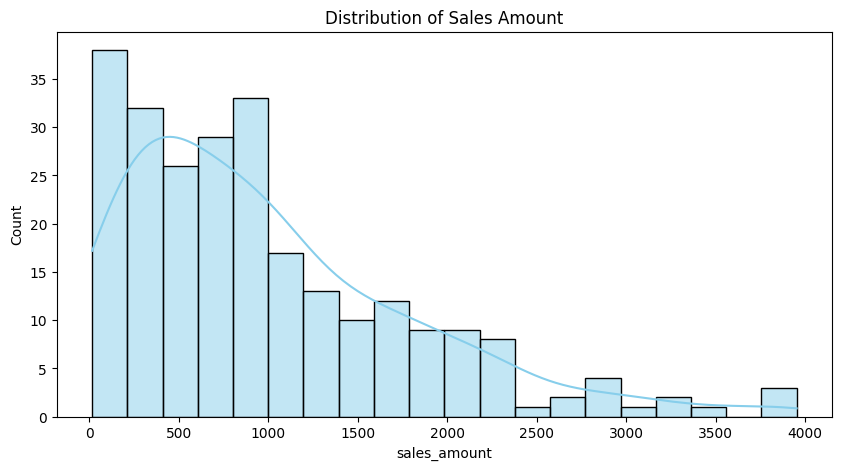

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data['sales_amount'],bins=20,kde=True,color="skyblue")
plt.title("Distribution of Sales Amount")
plt.show()

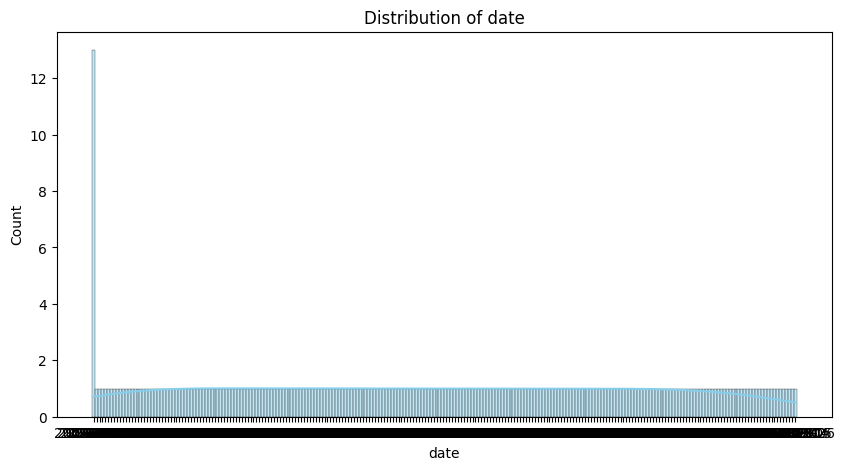

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data['date'],bins=20,kde=True,color="skyblue")
plt.title("Distribution of date")
plt.show()

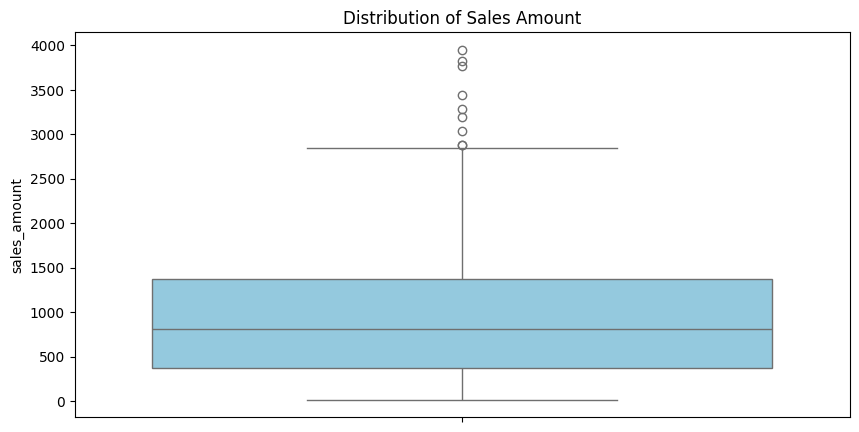

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data['sales_amount'],color="skyblue")
plt.title("Distribution of Sales Amount")
plt.show()

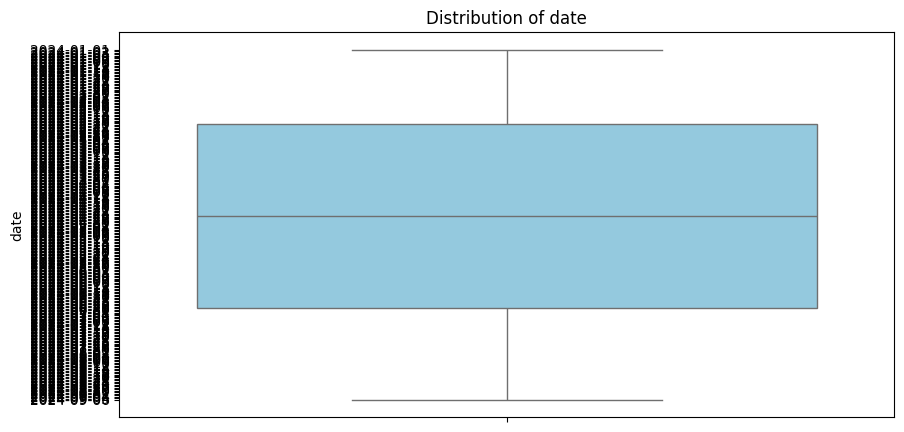

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data['date'],color="skyblue")
plt.title("Distribution of date")
plt.show()

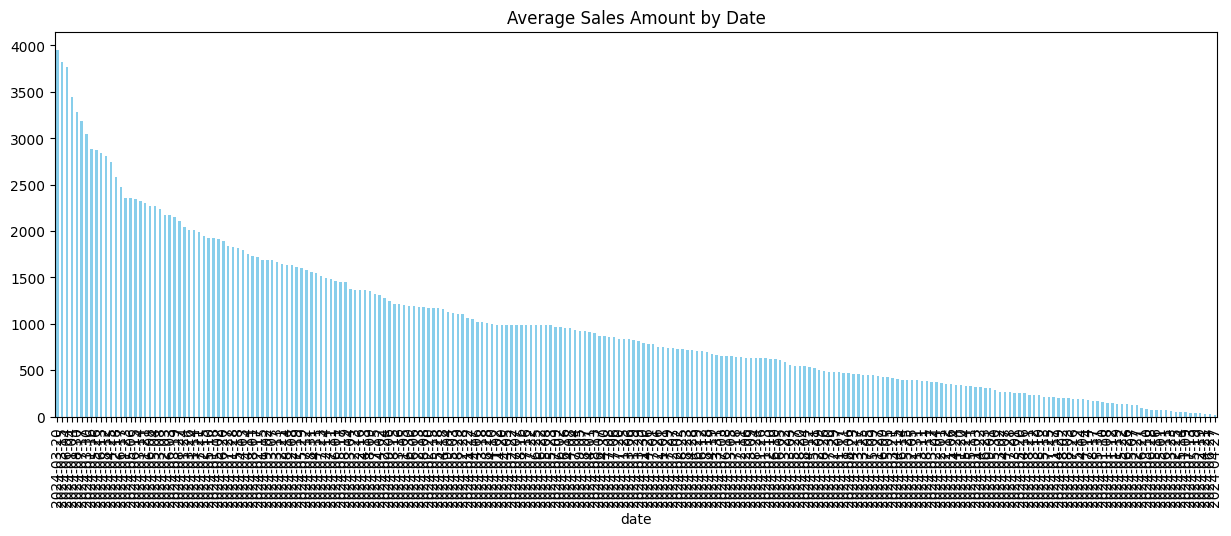

In [23]:
sp=data.groupby('date')['sales_amount'].mean().sort_values(ascending=False)
sp.plot(kind='bar',figsize=(15,5),color='skyblue')
plt.title('Average Sales Amount by Date')
plt.show()

we observe that Average sales amount is high in ealier dates and less in end dates.
